In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invweibull
from scipy.stats import dweibull
import scipy.stats as stats

In [2]:
%matplotlib notebook

In [3]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

<IPython.core.display.Javascript object>


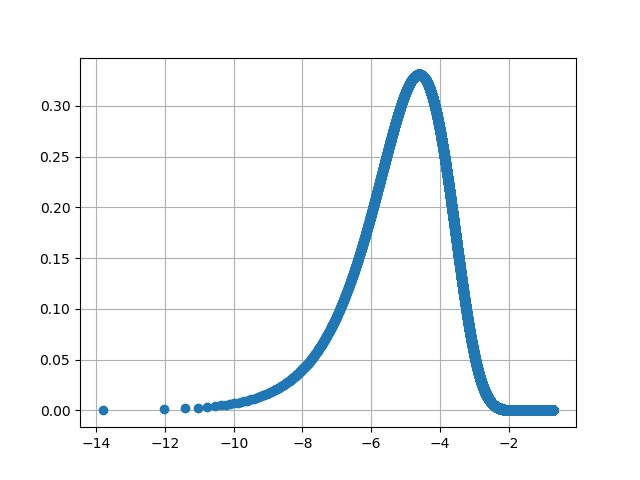

1.0000041388234995


In [4]:
# Generate a trial function
sigmaW = 0.1
sigma2W = sigmaW**2
etaW = 0.9
Z2max = .5
Z2 = np.linspace(0.000001,Z2max,100000)
y = np.log(Z2)
myWeibull = Weibull(Z2,sigma2W,etaW)
new_rho = myWeibull*Z2
plt.figure()
plt.plot(y,new_rho,'o')
plt.grid(True)
integral_rho = np.trapz(new_rho, y)
print(integral_rho)

In [5]:
# # Fit myWeibull(Z2) to obtain the best-fit sigmaW and etaW ...
# params = stats.exponweib.fit(Z2, floc=0, f0=1)
# shape = params[1]
# scale = params[3]
# print(shape)
# print(scale)
# values,bins,hist = plt.hist(Z2,bins=51,range=(0,25),normed=True)
# center = (bins[:-1] + bins[1:]) / 2.
# plt.plot(center,stats.exponweib.pdf(center,*params))



<IPython.core.display.Javascript object>


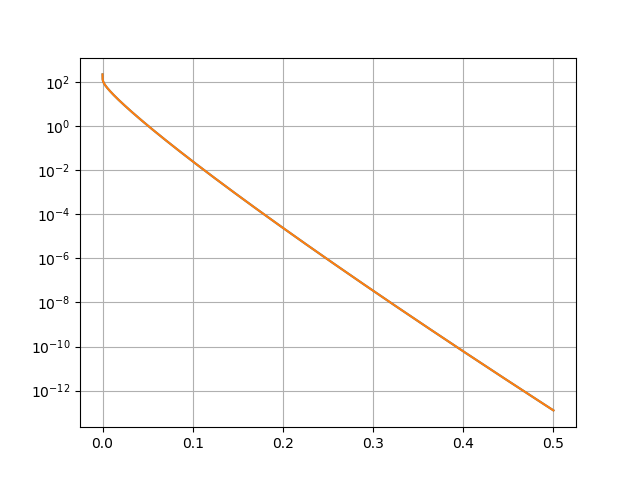

In [6]:
plt.figure()
plt.semilogy(Z2, myWeibull)
plt.semilogy(Z2, stats.exponweib.pdf((Z2/sigma2W), 1, etaW)/sigma2W)
plt.grid(True)

[41017 28990 22581 17976 14604 11810  9844  8082  6773  5547  4571  3830
  3215  2741  2363  1863  1650  1395  1131   998   867   768   599   525
   465   401   319   222   198   195   163   164   119   116    79    79
    65    62    63    44    38    32    27    27    16    17    17    10
     7]
[0.0001     0.00213878 0.00417755 0.00621633 0.0082551  0.01029388
 0.01233265 0.01437143 0.0164102  0.01844898 0.02048776 0.02252653
 0.02456531 0.02660408 0.02864286 0.03068163 0.03272041 0.03475918
 0.03679796 0.03883673 0.04087551 0.04291429 0.04495306 0.04699184
 0.04903061 0.05106939 0.05310816 0.05514694 0.05718571 0.05922449
 0.06126327 0.06330204 0.06534082 0.06737959 0.06941837 0.07145714
 0.07349592 0.07553469 0.07757347 0.07961224 0.08165102 0.0836898
 0.08572857 0.08776735 0.08980612 0.0918449  0.09388367 0.09592245
 0.09796122 0.1       ]
200000
387.41996092475523


<IPython.core.display.Javascript object>


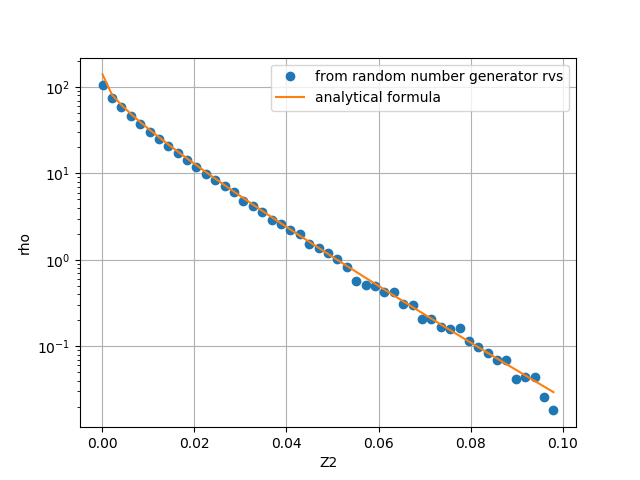

Text(0,0.5,'rho')

In [10]:
x_rand = stats.exponweib.rvs(1, etaW, size=200000)*sigma2W
bins = np.linspace(0.0001, 0.1, 50)
counts, bins = np.histogram(x_rand, bins)
newbins = bins[0: -1]
print(counts)
print(bins)
print(len(x_rand))

# normalizing our function
y2 = np.log(newbins)
counts_prime = counts*newbins

integral_y2 = np.trapz(counts_prime, y2)
print(integral_y2)


counts = counts/integral_y2

plt.figure()

plt.semilogy(newbins, counts, 'o', label='from random number generator rvs')
#plt.semilogy(Z2, myWeibull)
plt.semilogy(newbins, Weibull(newbins,sigma2W,etaW), label = 'analytical formula')
plt.grid(True)
plt.legend()
plt.xlabel('Z2')
plt.ylabel('rho')


In [150]:
(d1, etaW_best, d2, sigma2W_best) = stats.exponweib.fit(x_rand)
print(etaW_best)
print(sigma2W_best)

C:\Users\Margaret Berrens\New folder\New folder\New folder\lib\site-packages\scipy\stats\_continuous_distns.py:1240: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


1.01259971423
0.0120530481824
